In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import load_model

from IAdeforestation.preprocessing import normalize
from IAdeforestation.training import eurosat_params
from IAdeforestation.visualization import make_gradcam_heatmap, apply_grad_cam_to_image

In [2]:
model = load_model(os.path.join('saved_models', 'transfer_learning', 'Coffee','transfer_learning3', 'transfer_learning3.h5'))
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 13)] 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 70, 70, 13)   0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   40768       zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block19_1_conv (Conv2D)   (None, 2, 2, 128)    188416      conv5_block19_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block19_1_bn (BatchNormal (None, 2, 2, 128)    512         conv5_block19_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block19_1_relu (Activatio (None, 2, 2, 128)    0           conv5_block19_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block19_2_conv (Conv2D)   (None, 2, 2, 32)     36864       conv5_block19_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block19_concat (Concatena (None, 2, 2, 1504)   0           conv5_block18_concat[0][0]       
          

In [3]:
model.layers[-1].activation = None

In [4]:
interest_conv_layers = [("32x32 Conv","conv1/conv"), 
                        ("16x16 Conv","pool2_conv"), 
                        ("8x8 Conv","pool3_conv"), 
                        ("4x4 Conv","pool4_conv"), 
                        ("2x2 Conv","conv5_block32_2_conv")]

## Grad Cam Coffee

In [5]:
IMAGE_DIR = 'images'
COFFEE_DIR = '2'
image_paths = [("Coffee", os.path.join(IMAGE_DIR, COFFEE_DIR, "Fall_15_74.tiff")),
               ("Coffee", os.path.join(IMAGE_DIR, COFFEE_DIR,  "Spring_15_66.tiff")),
               ("Coffee", os.path.join(IMAGE_DIR, COFFEE_DIR,  "Summer_19_71.tiff")),
               ("Coffee", os.path.join(IMAGE_DIR, COFFEE_DIR,  "Winter_43_18.tiff"))]

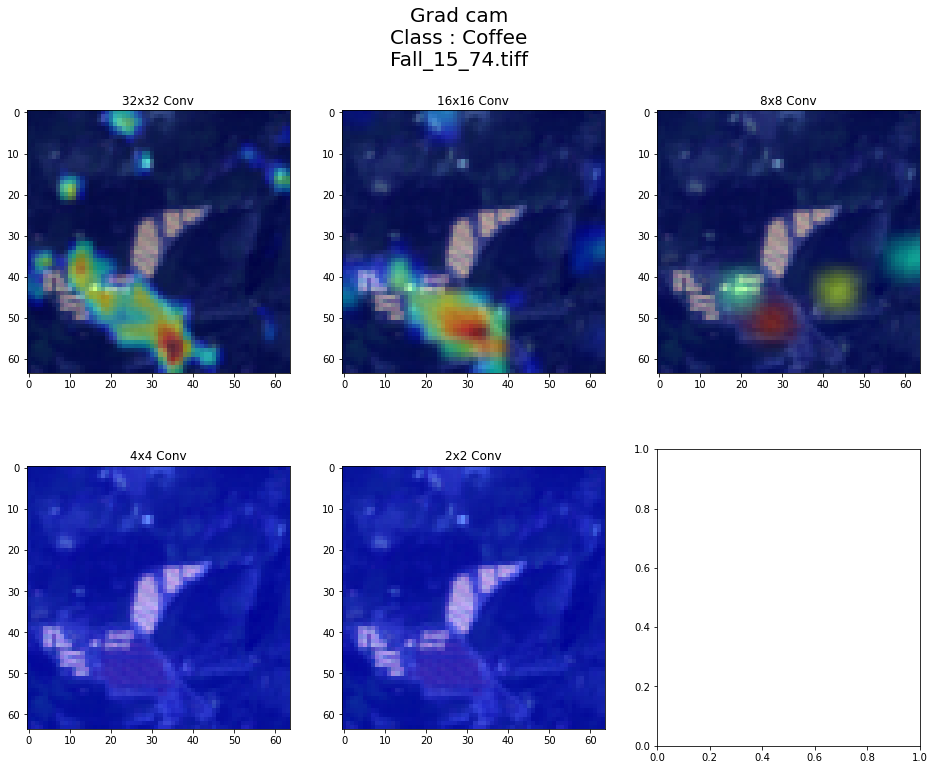

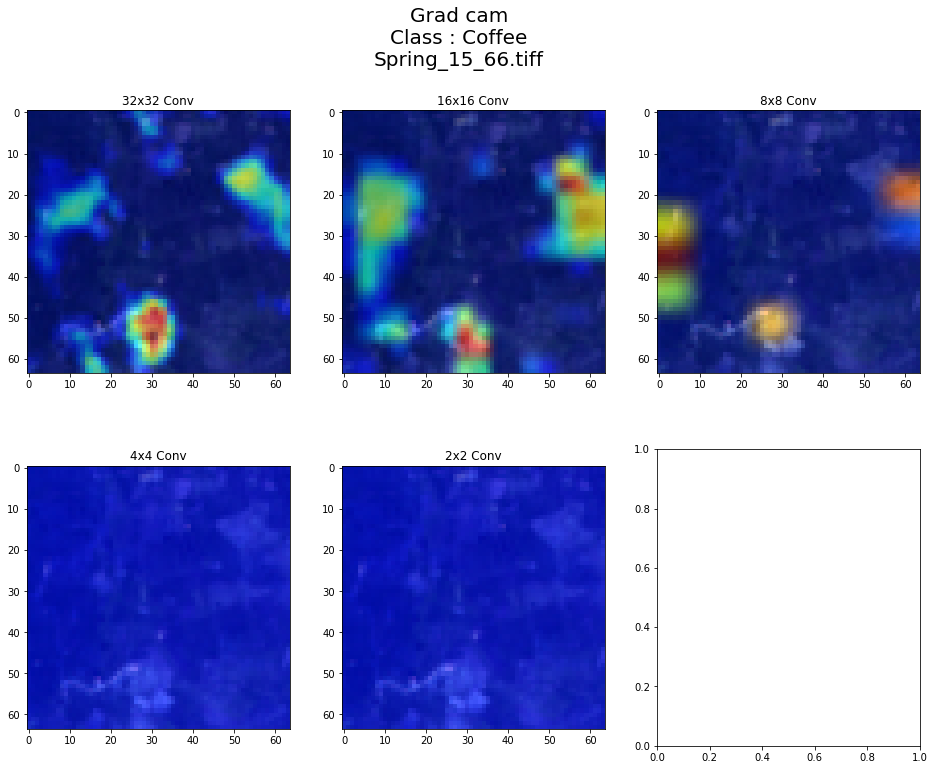

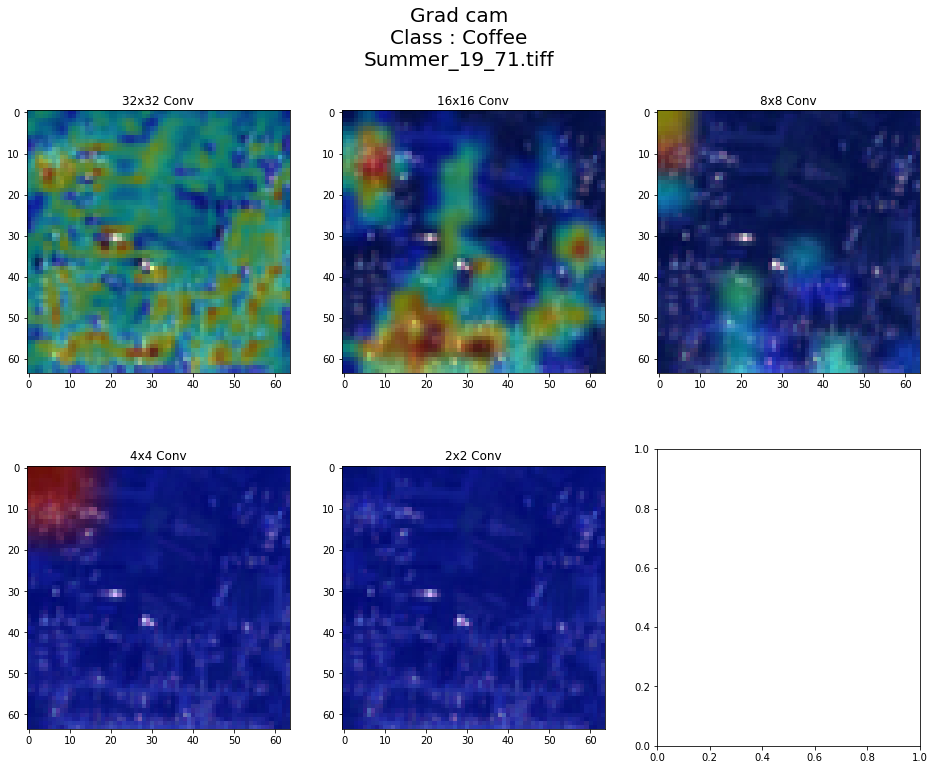

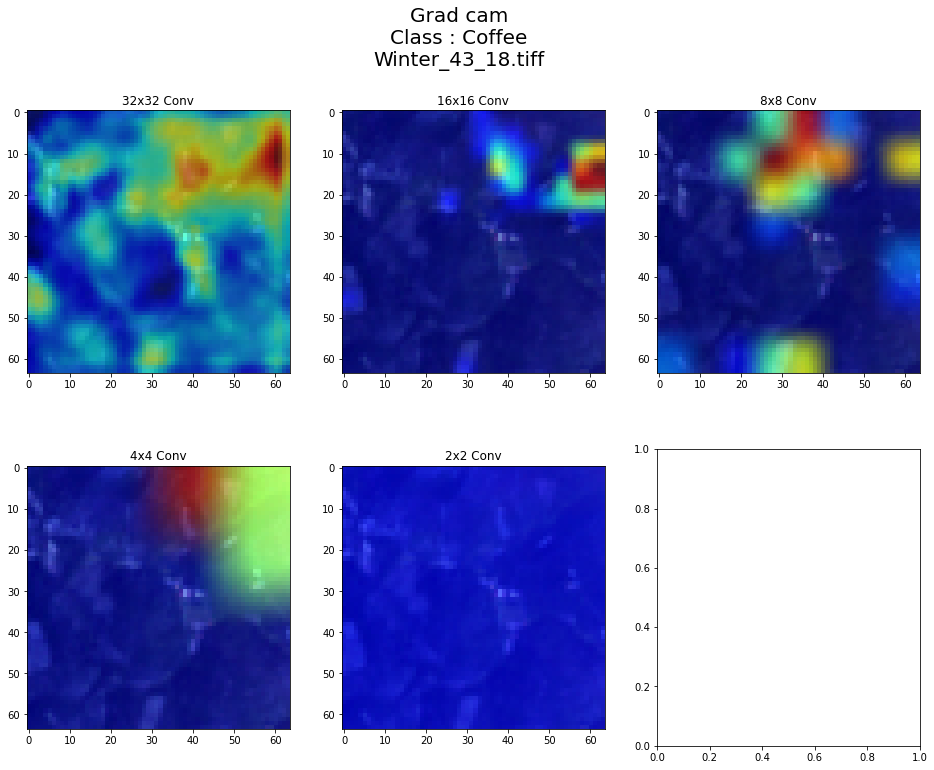

In [6]:
ALPHA = 0.02

for class_name, path in image_paths:
    img = rasterio.open(path).read()
    img = np.float32(np.moveaxis(img, 0, -1))
    img = normalize(img, eurosat_params['mean'], eurosat_params['std']).reshape(1,64,64,13)

    fig, axes = plt.subplots(2,3, figsize=(16,12))
    axes = axes.flatten()

    for i, layer in enumerate(interest_conv_layers):
        heatmap = make_gradcam_heatmap(img, model, layer[1])
        grad_img = apply_grad_cam_to_image(img, heatmap, alpha=ALPHA)
        axes[i].imshow(grad_img)
        axes[i].set_title(layer[0])

    fig.suptitle(f"Grad cam\nClass : {class_name}\n{os.path.split(path)[1]}", fontsize=20)

## Grad Cam Other

In [59]:
image_paths = [('Nativevege', os.path.join(IMAGE_DIR, '4', 'Fall_59_30.tiff')),
               ('Urban', os.path.join(IMAGE_DIR, '9', 'Spring_55_71.tiff')),
               ('Water', os.path.join(IMAGE_DIR, '10', 'Summer_86_84.tiff')),
               ('Rice', os.path.join(IMAGE_DIR, '18', 'Winter_111_43.tiff'))]

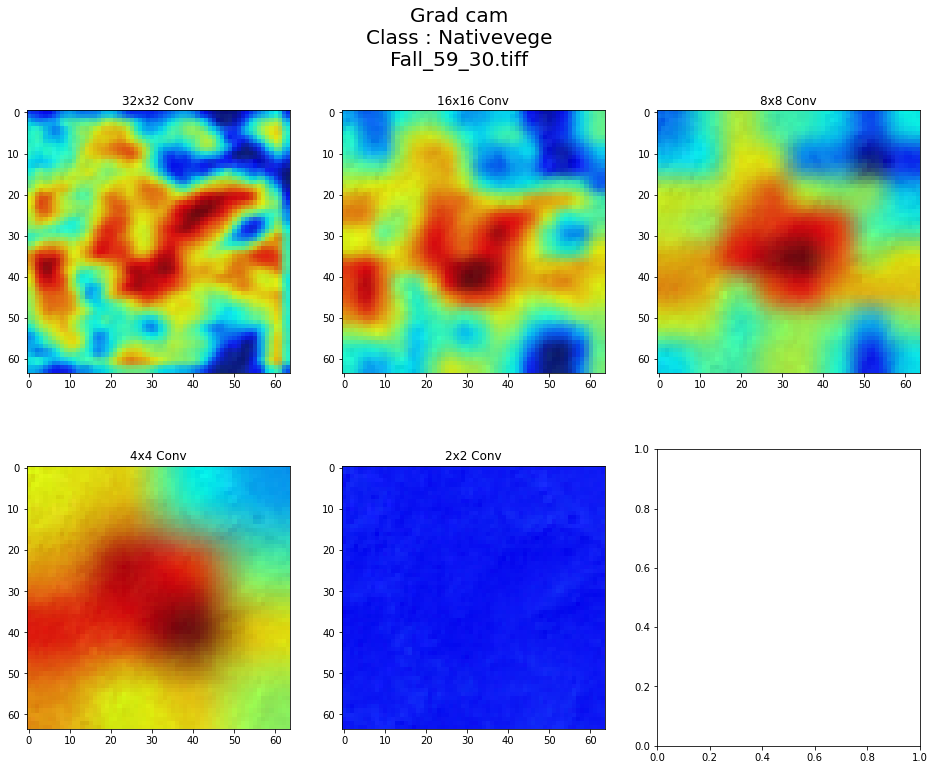

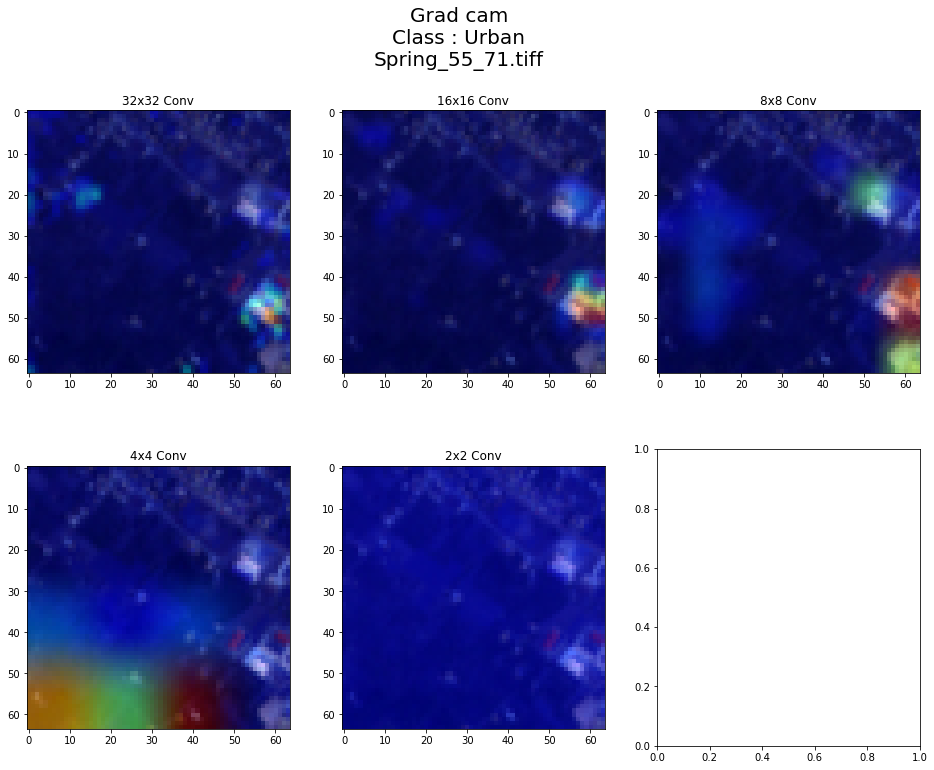

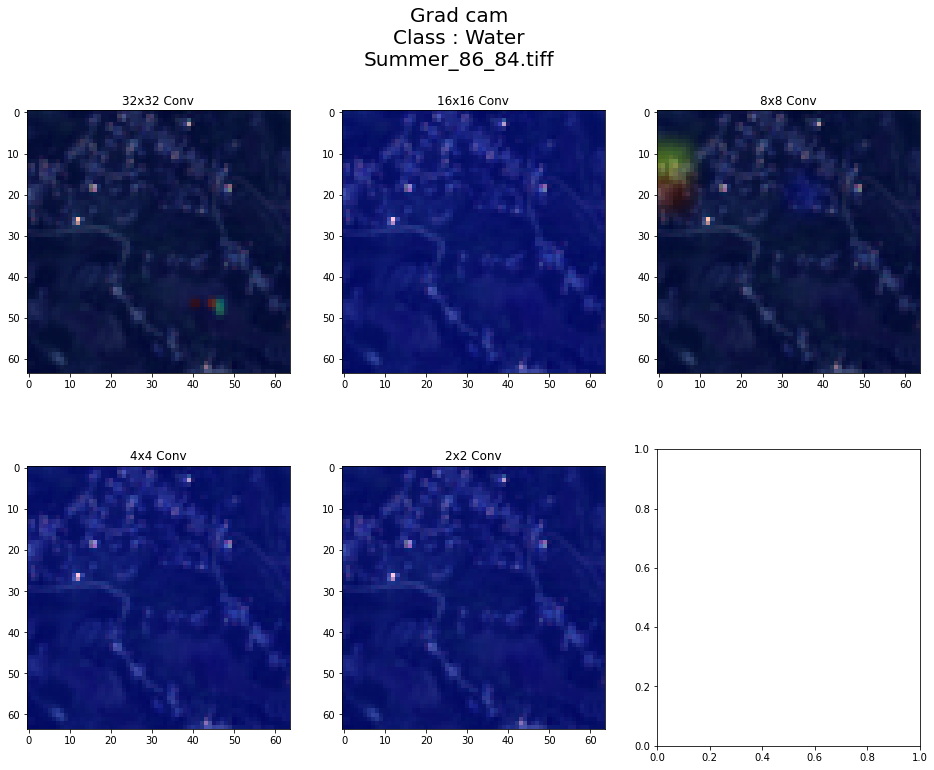

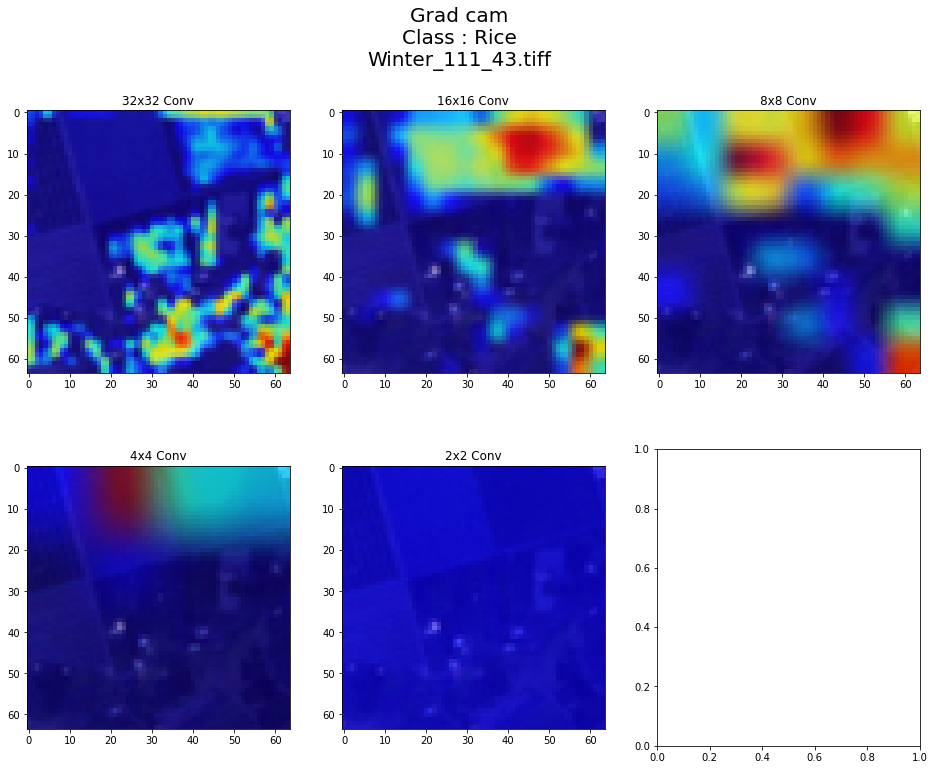

In [60]:
ALPHA = 0.02

for class_name, path in image_paths:
    img = rasterio.open(path).read()
    img = np.float32(np.moveaxis(img, 0, -1))
    img = normalize(img, eurosat_params['mean'], eurosat_params['std']).reshape(1,64,64,13)

    fig, axes = plt.subplots(2,3, figsize=(16,12))
    axes = axes.flatten()

    for i, layer in enumerate(interest_conv_layers):
        heatmap = make_gradcam_heatmap(img, model, layer[1])
        grad_img = apply_grad_cam_to_image(img, heatmap, alpha=ALPHA)
        axes[i].imshow(grad_img)
        axes[i].set_title(layer[0])

    fig.suptitle(f"Grad cam\nClass : {class_name}\n{os.path.split(path)[1]}", fontsize=20)